In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [4]:
df = pd.read_csv("twitter_training.csv")
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [6]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [7]:
df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [15]:
df.shape

(74681, 4)

In [17]:
df.duplicated().sum()

2700

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [19]:
df.columns

Index(['ID', 'Topic', 'Sentiment', 'Text'], dtype='object')

In [20]:
df.columns = ['ID', 'Topic', 'Sentiment', 'Text']

In [21]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Negative      21787
Positive      19810
Neutral       17800
Irrelevant    12584
Name: count, dtype: int64

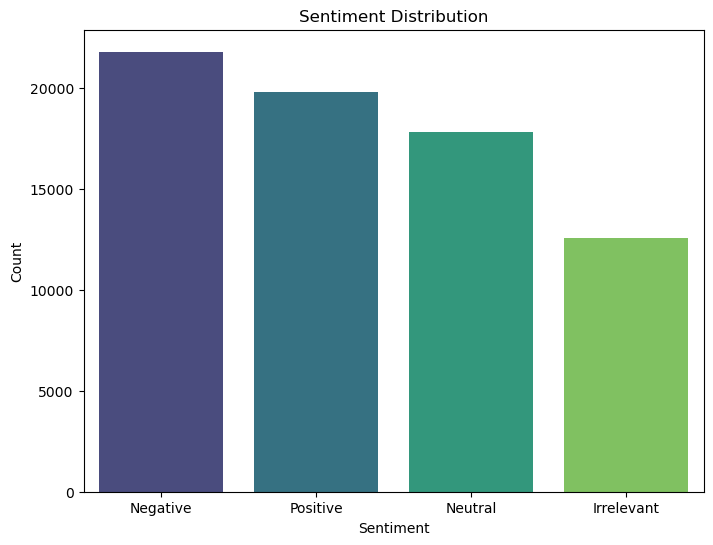

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

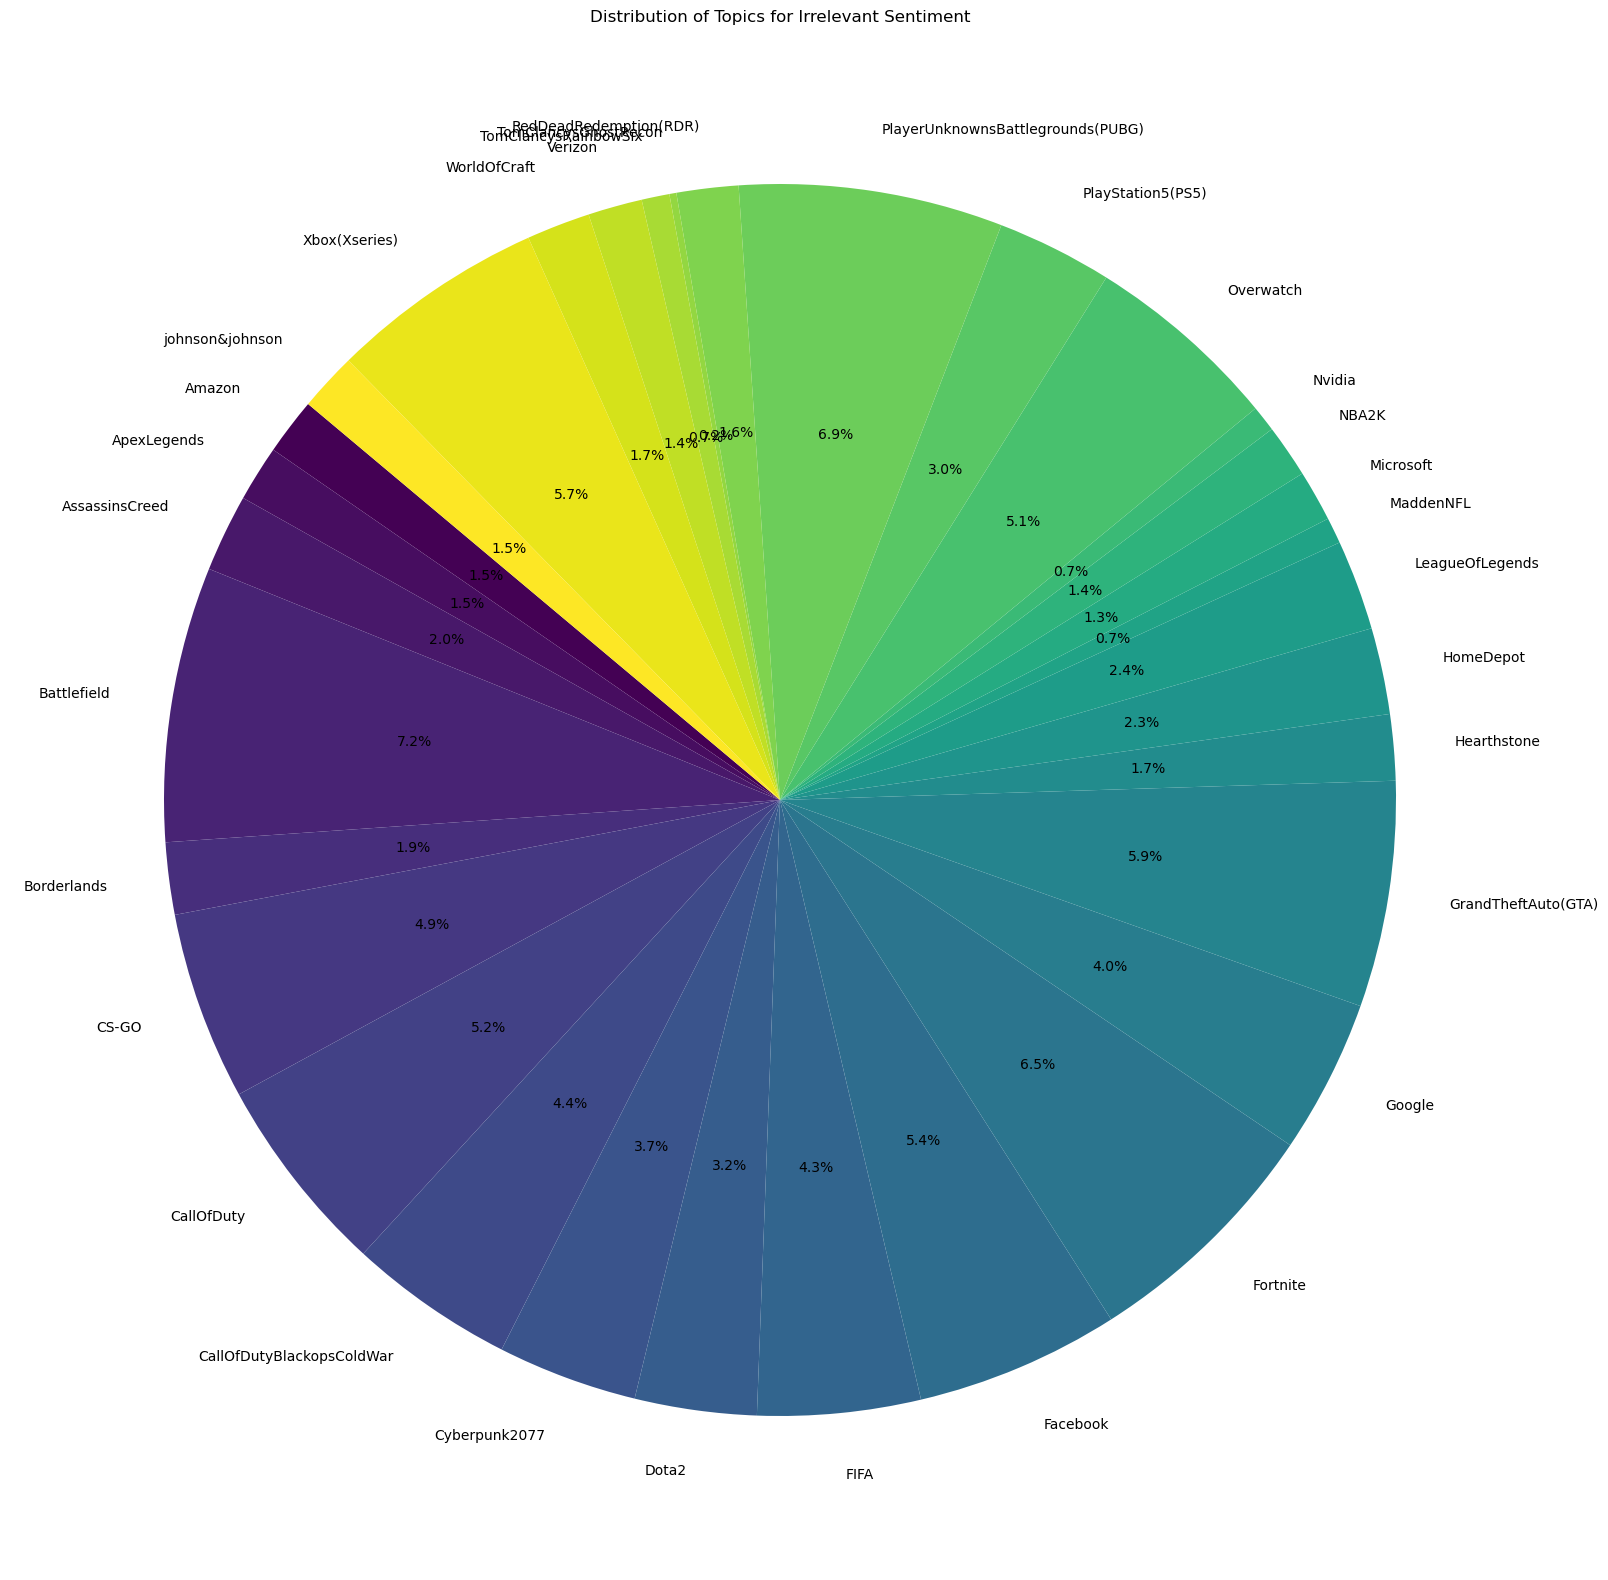

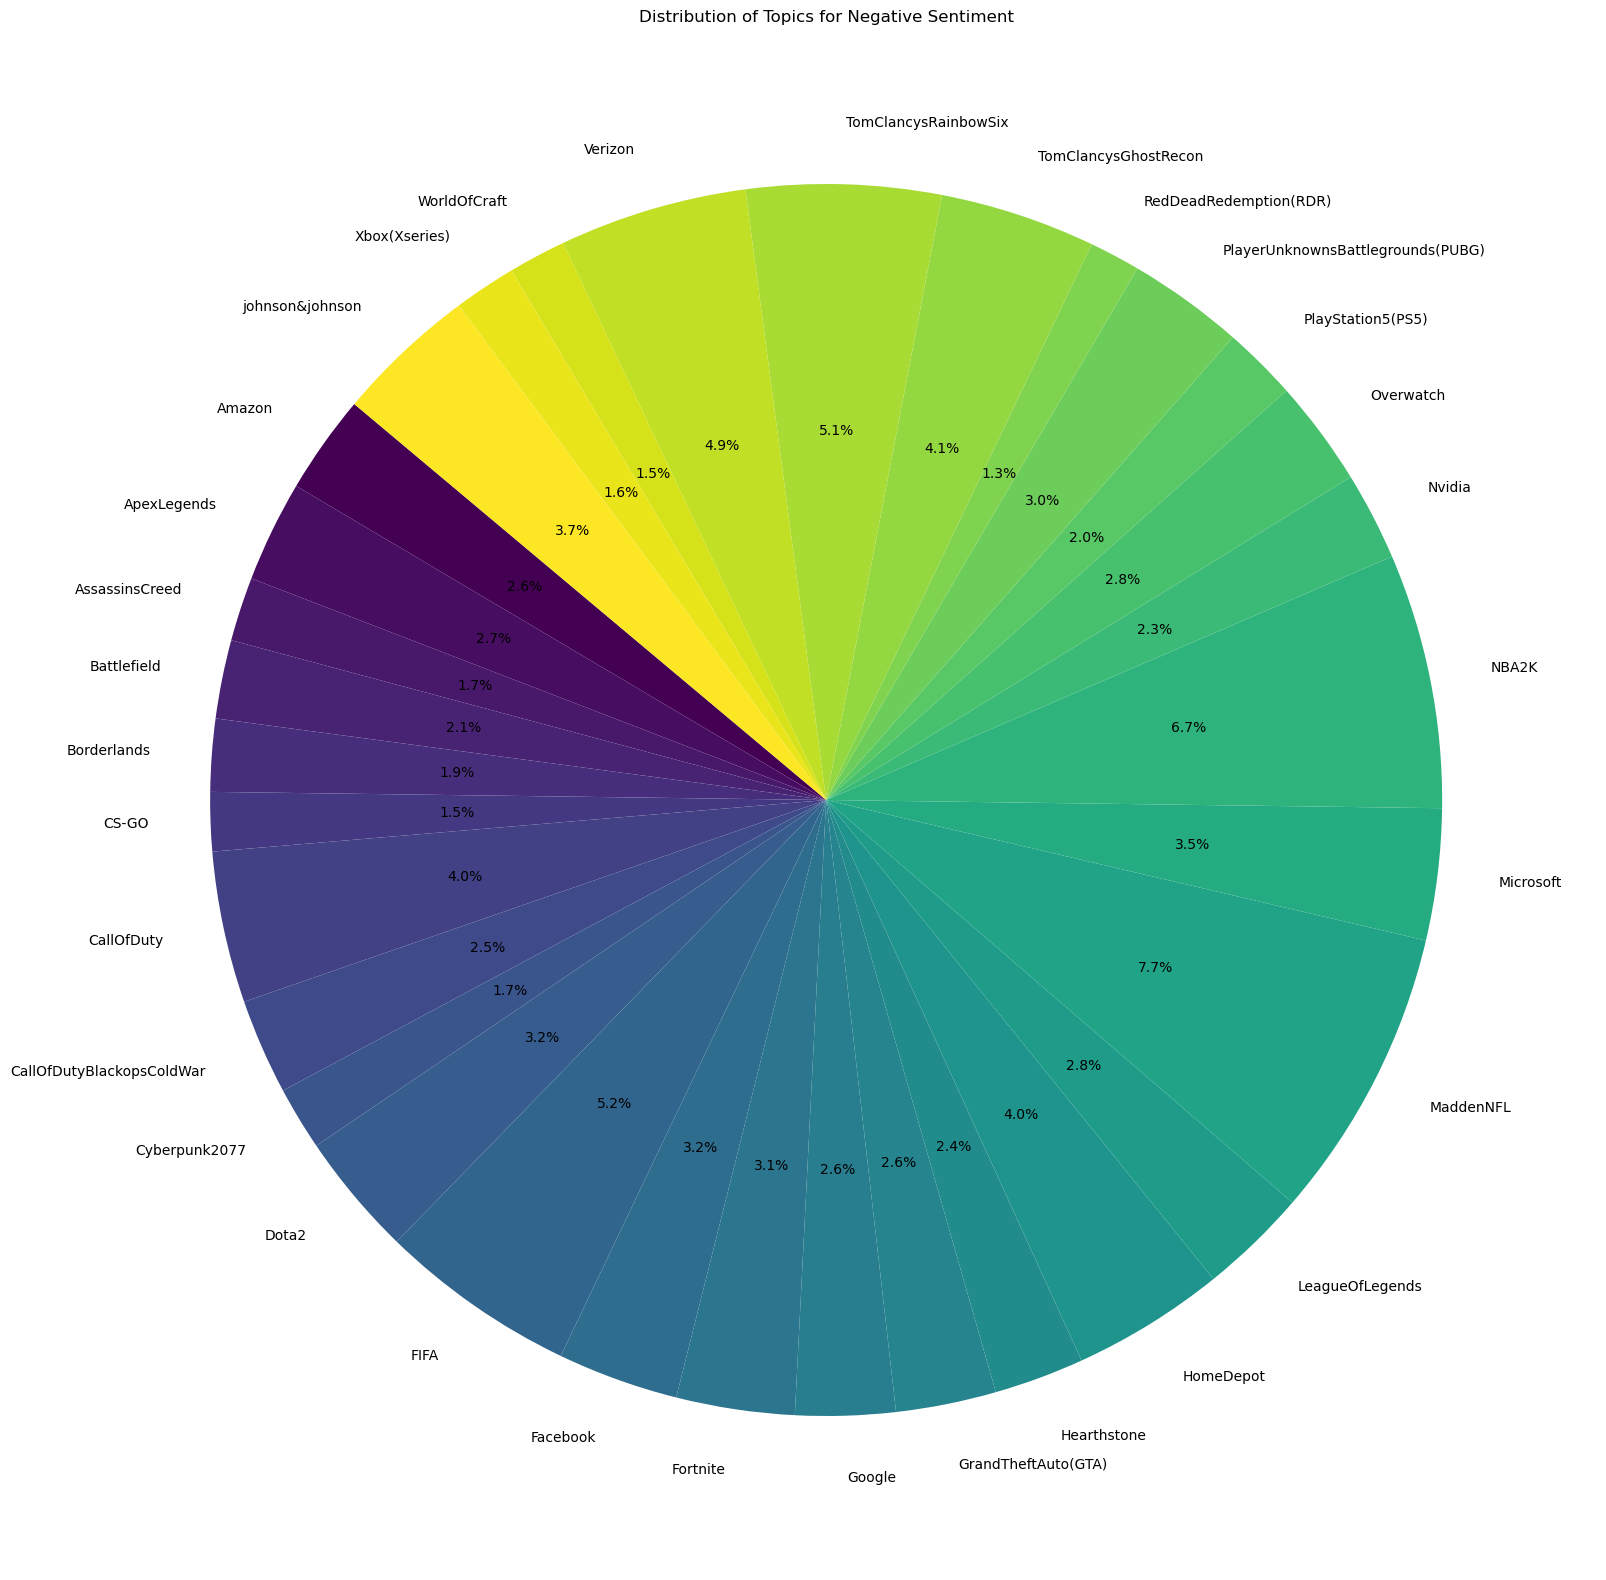

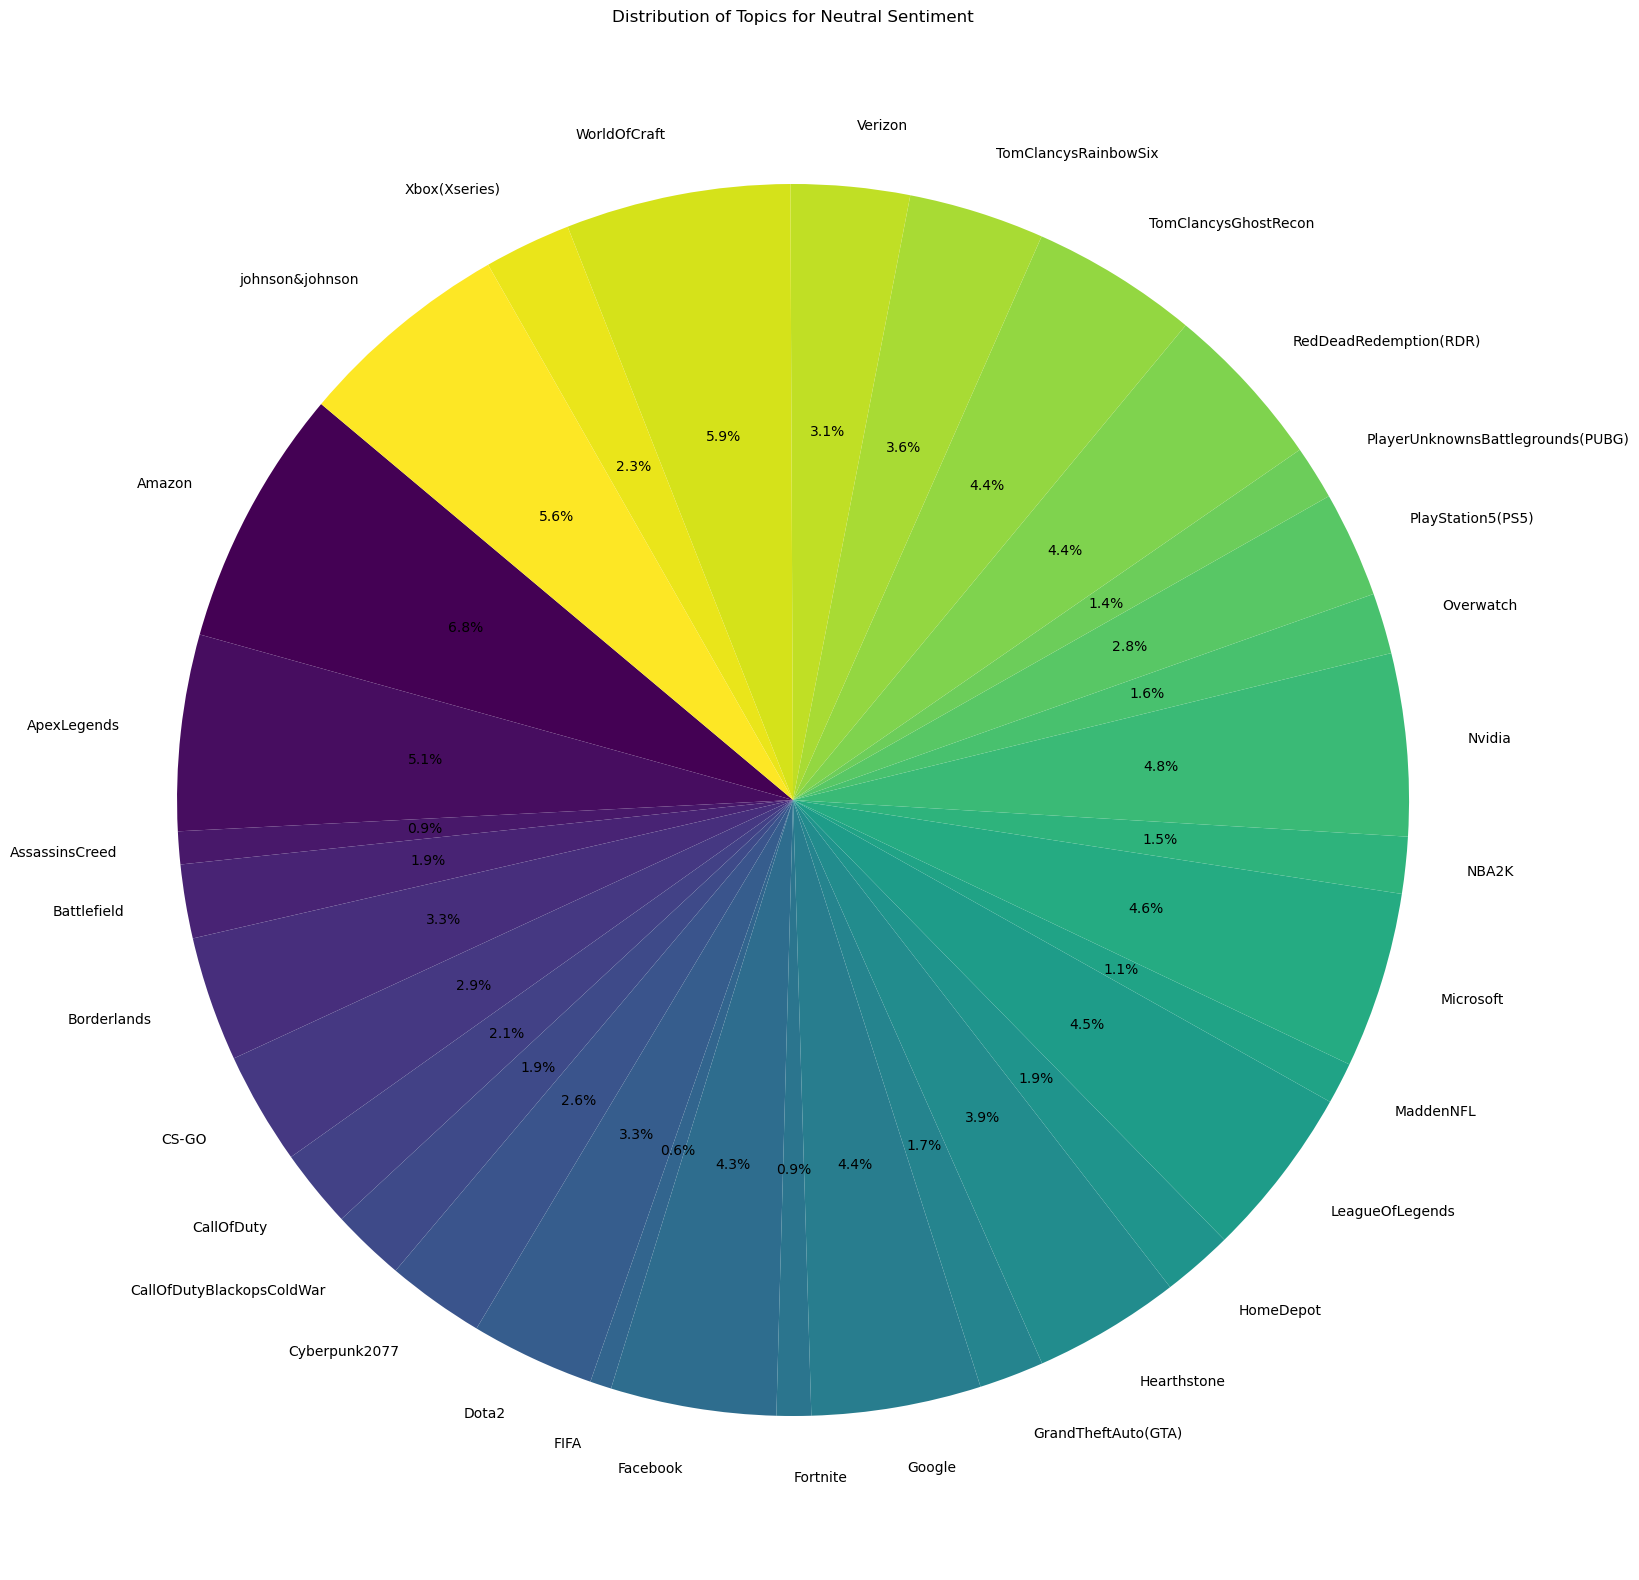

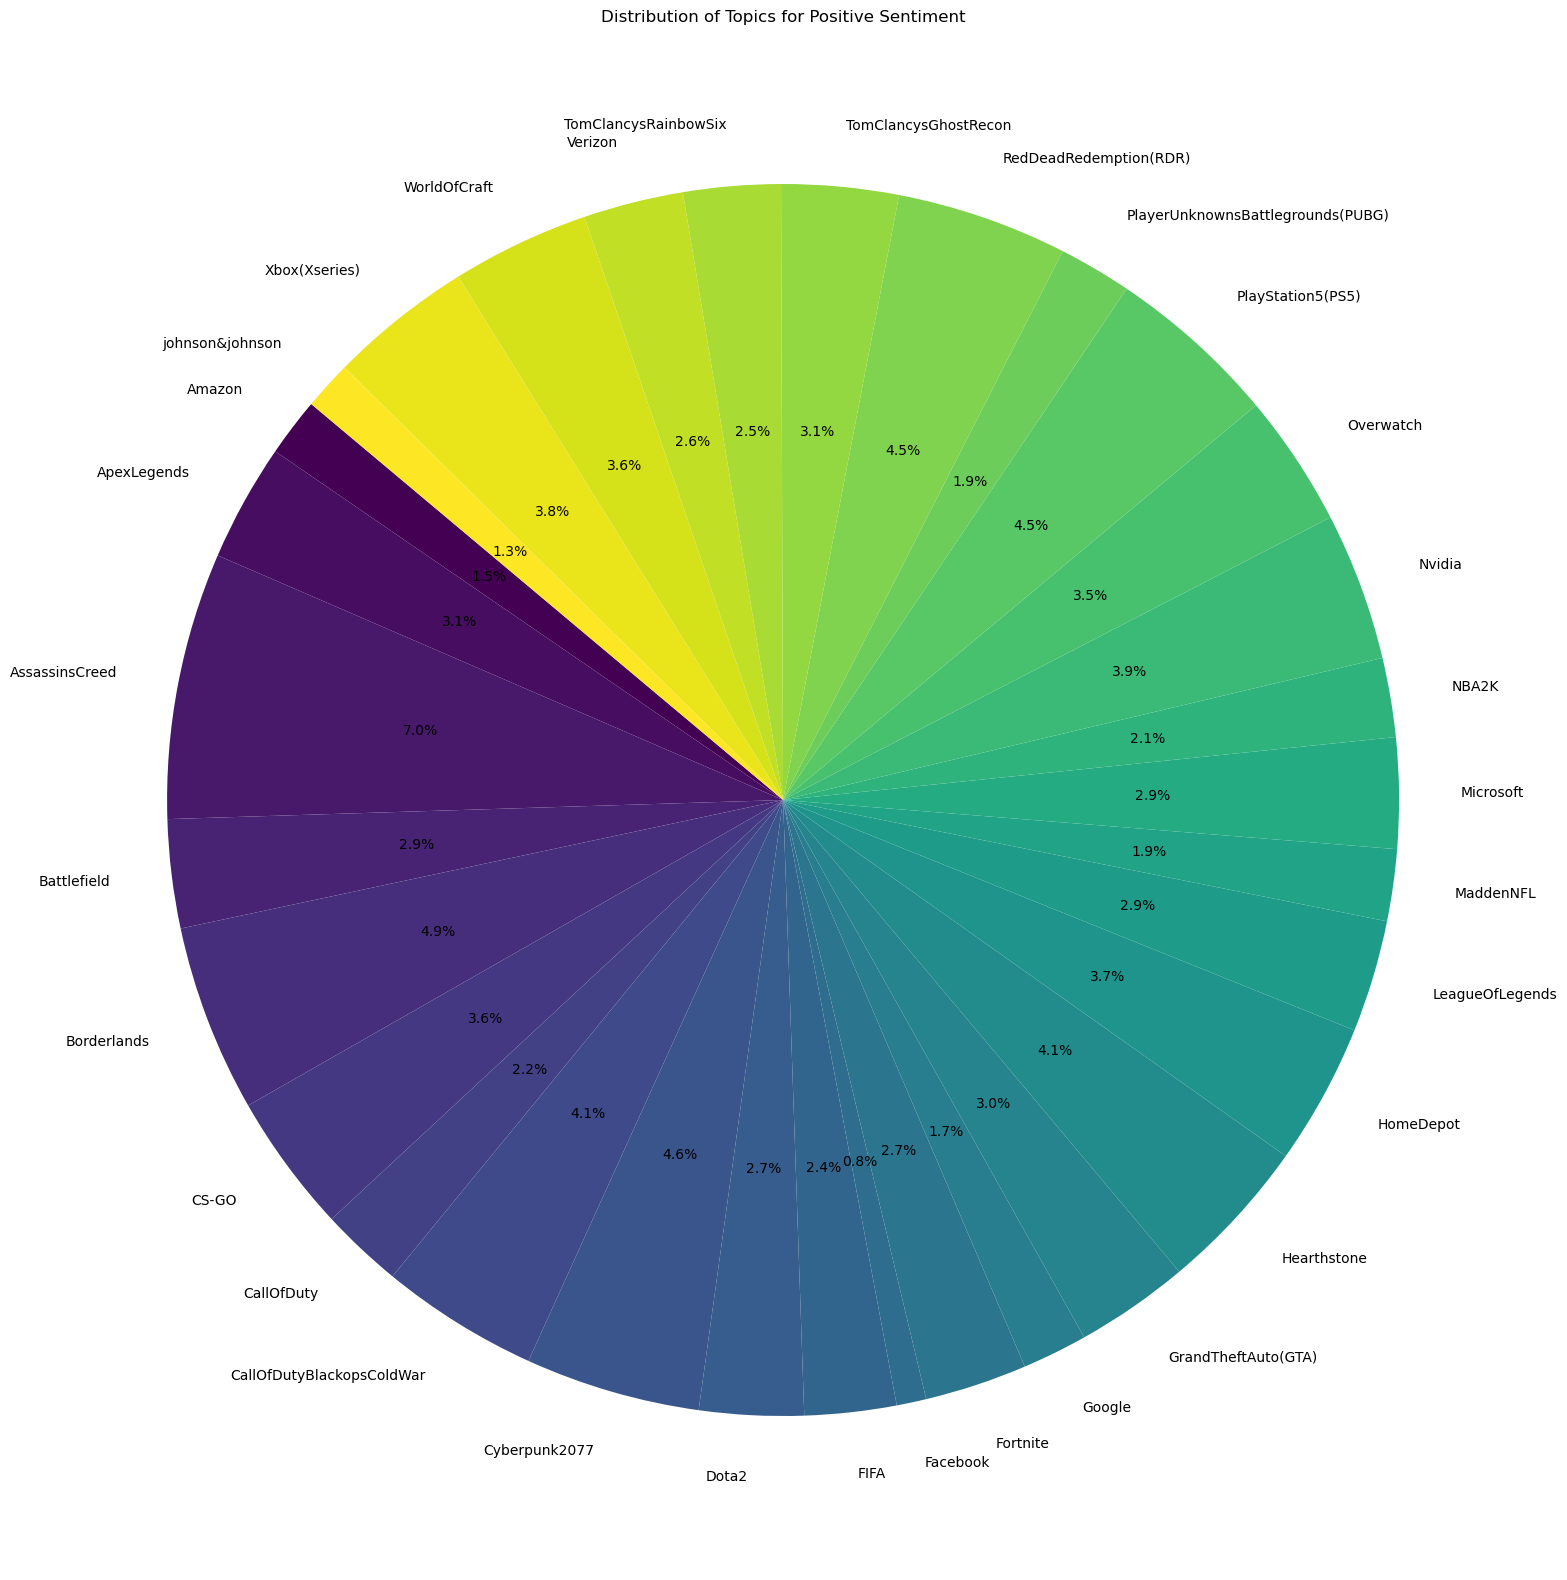

In [38]:
grouped_data = df.groupby(['Sentiment', 'Topic']).size().unstack().fillna(0)
for sentiment in grouped_data.index:
    plt.figure(figsize=(24,20))
    grouped_data.loc[sentiment].plot.pie(autopct='%1.1f%%', startangle=140, colormap='viridis')
    plt.title(f'Distribution of Topics for {sentiment} Sentiment')
    plt.ylabel('') 
    plt.show()

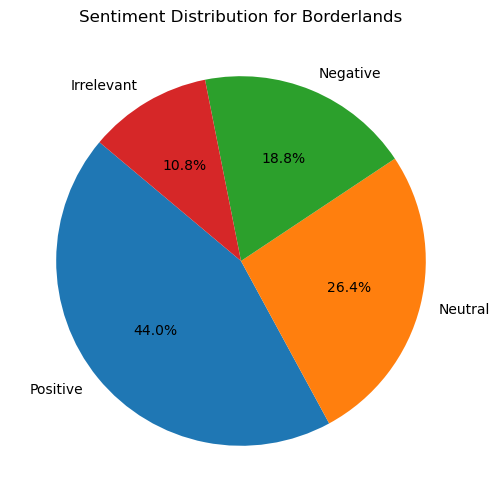

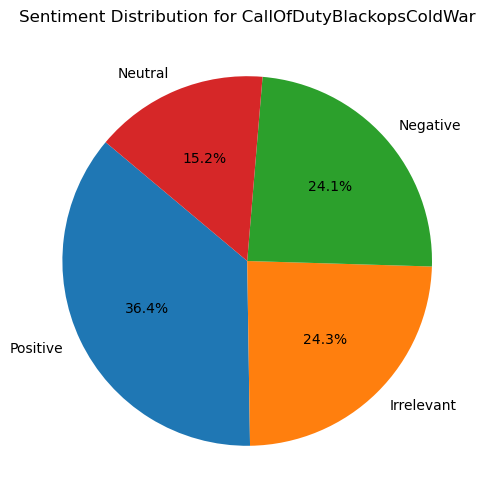

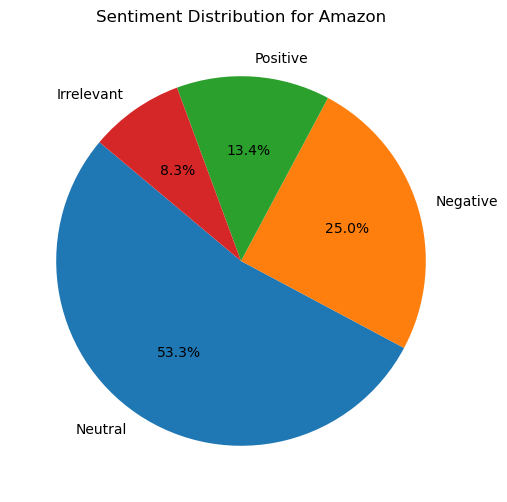

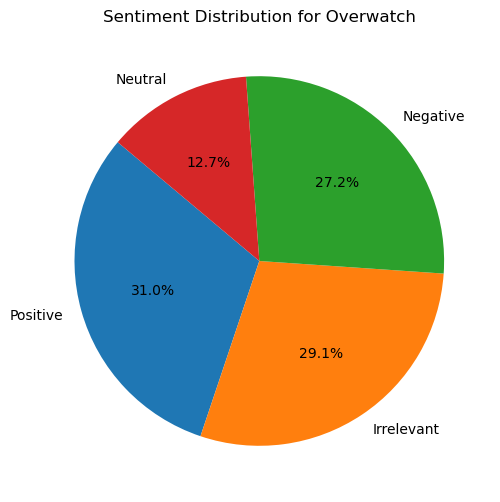

C:\Users\hp\AppData\Local\Temp\ipykernel_6796\591081317.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  topic_data = df[df['Topic'].str.contains(topic, case=False)]


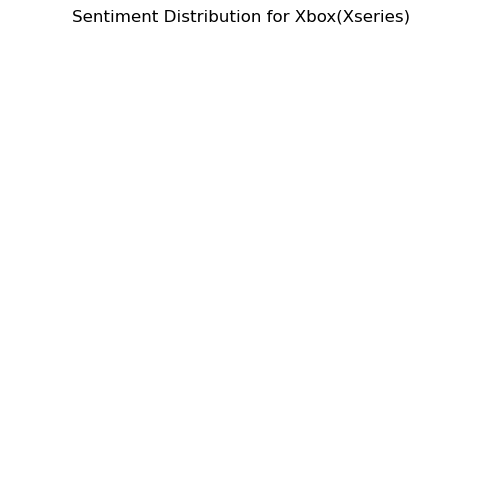

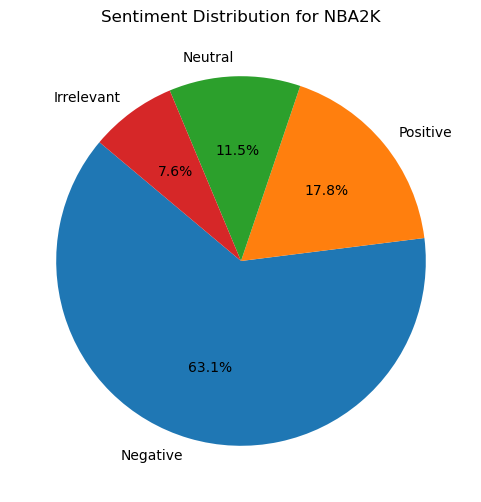

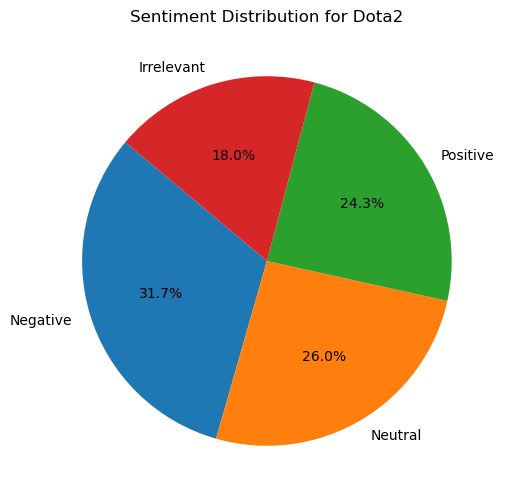

C:\Users\hp\AppData\Local\Temp\ipykernel_6796\591081317.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  topic_data = df[df['Topic'].str.contains(topic, case=False)]


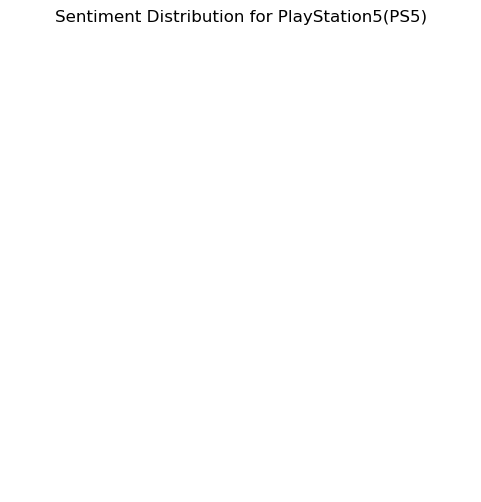

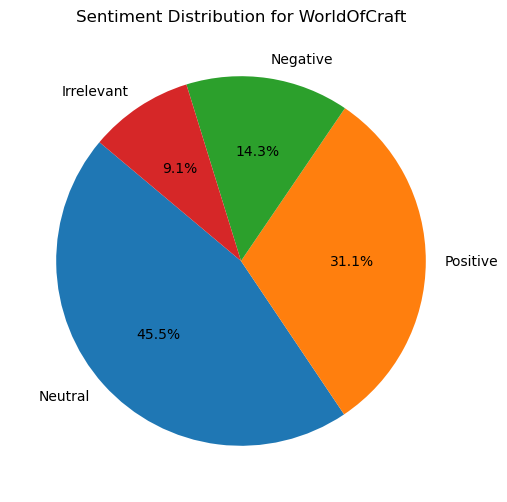

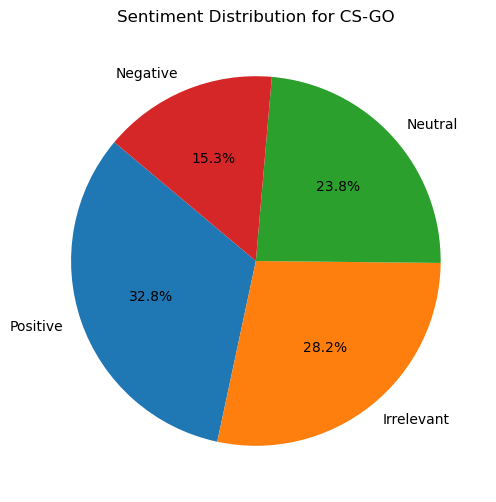

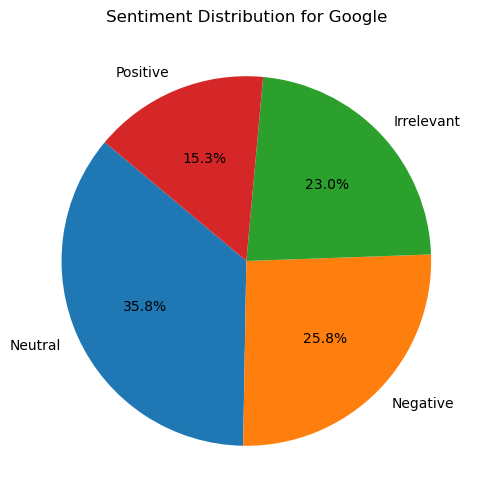

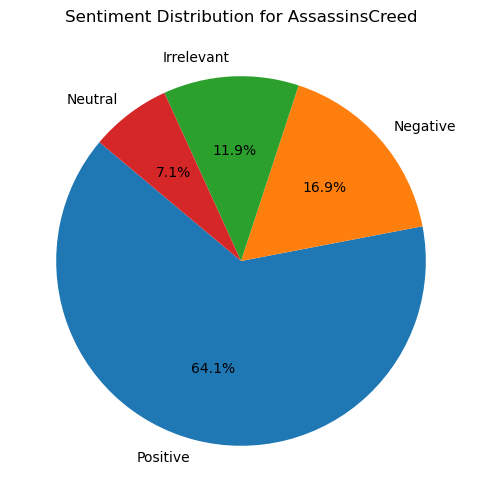

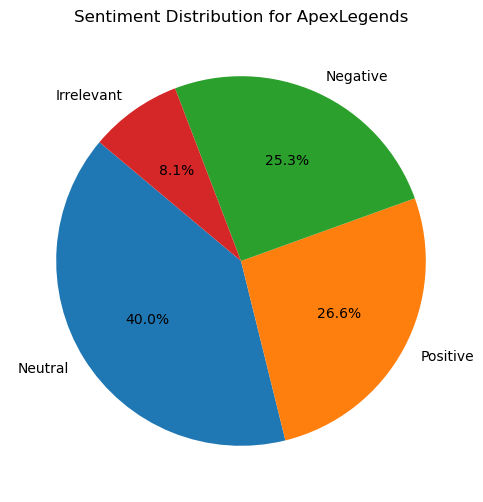

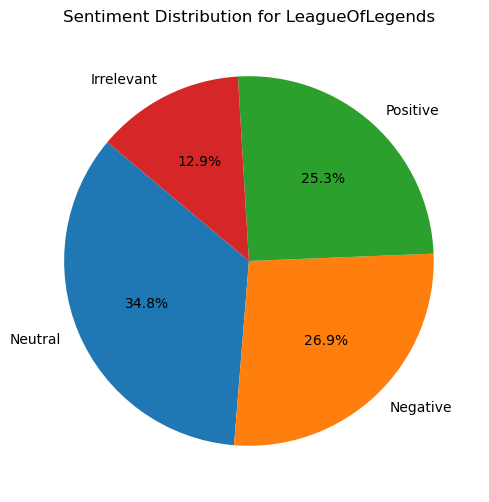

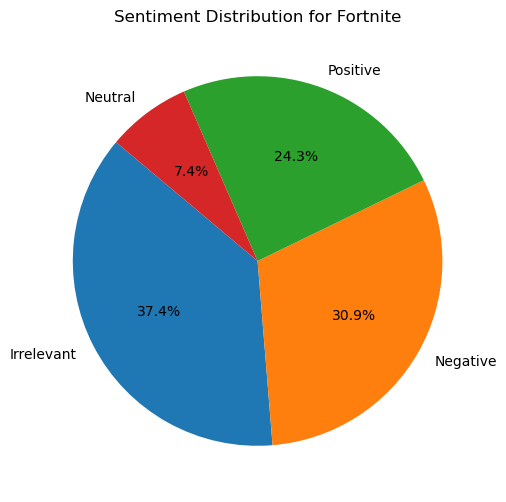

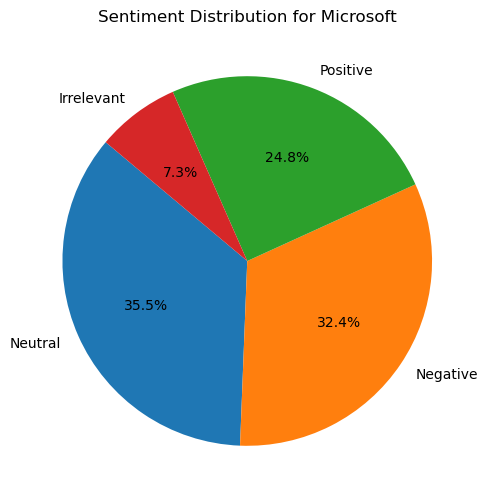

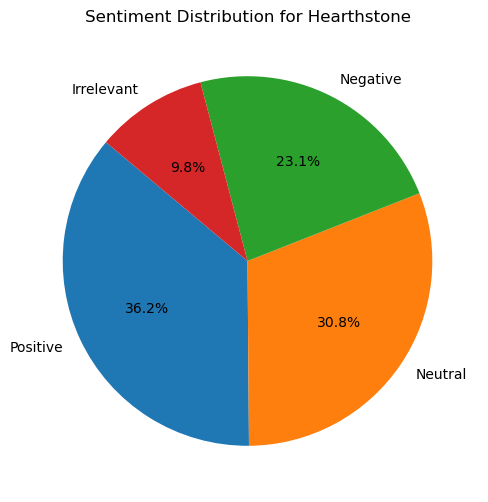

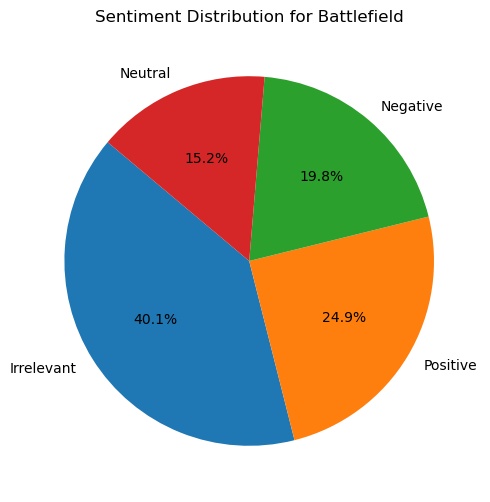

C:\Users\hp\AppData\Local\Temp\ipykernel_6796\591081317.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  topic_data = df[df['Topic'].str.contains(topic, case=False)]


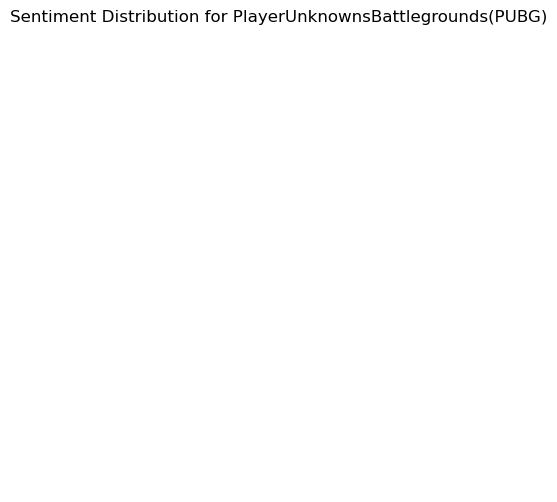

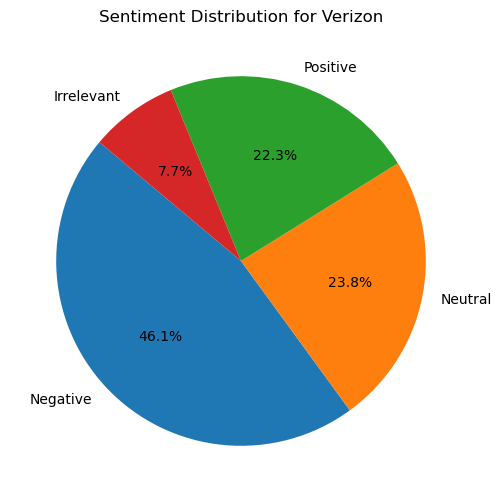

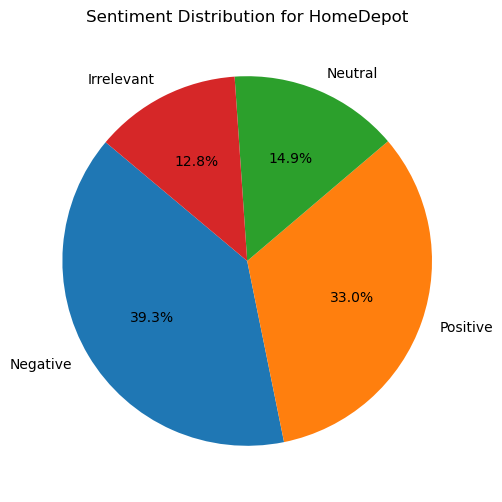

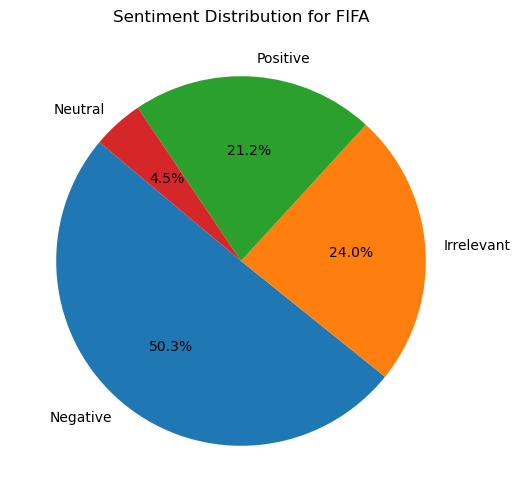

C:\Users\hp\AppData\Local\Temp\ipykernel_6796\591081317.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  topic_data = df[df['Topic'].str.contains(topic, case=False)]


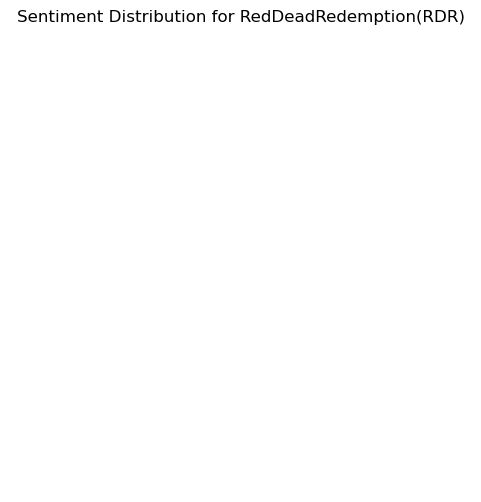

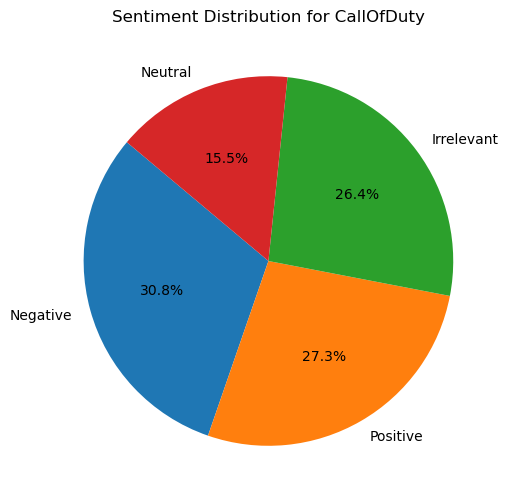

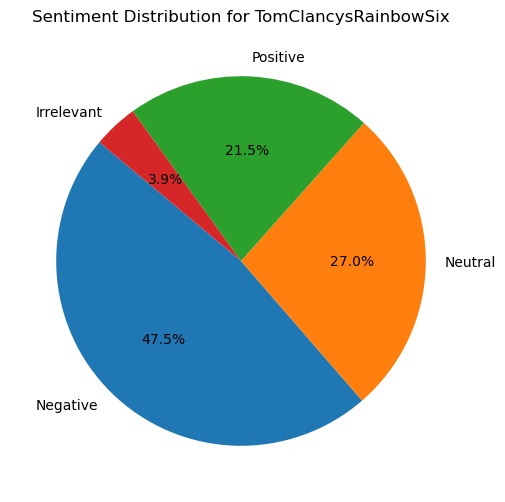

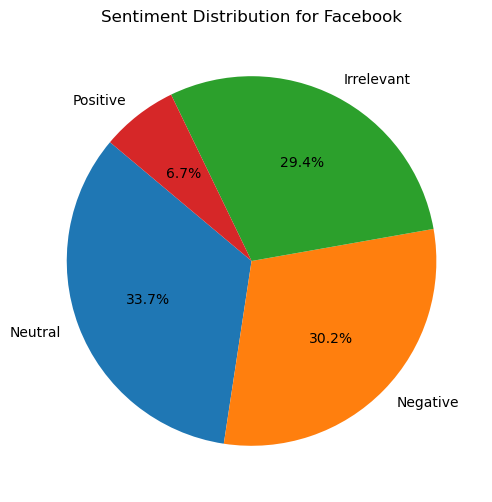

C:\Users\hp\AppData\Local\Temp\ipykernel_6796\591081317.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  topic_data = df[df['Topic'].str.contains(topic, case=False)]


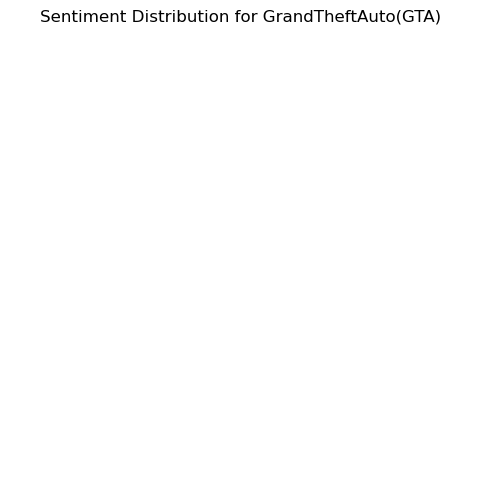

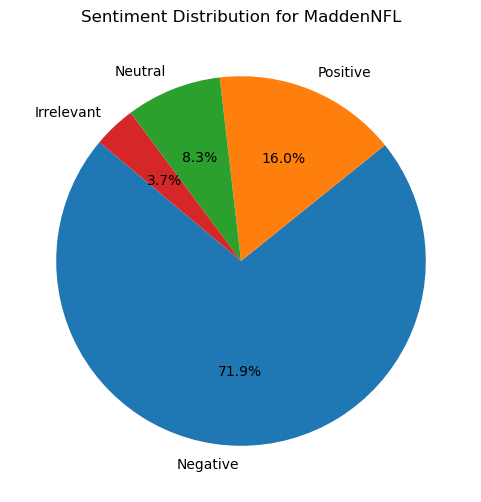

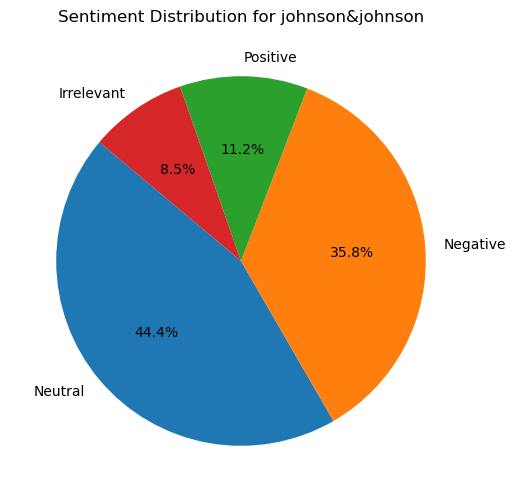

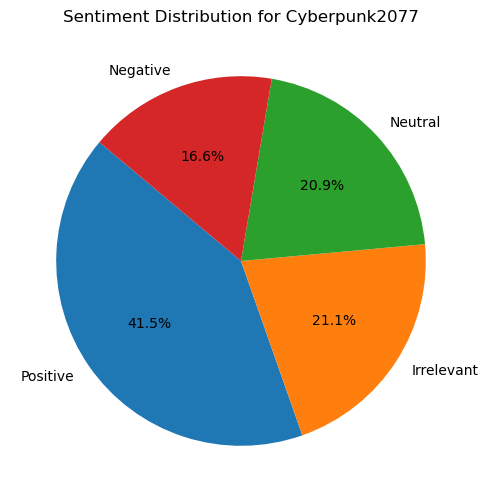

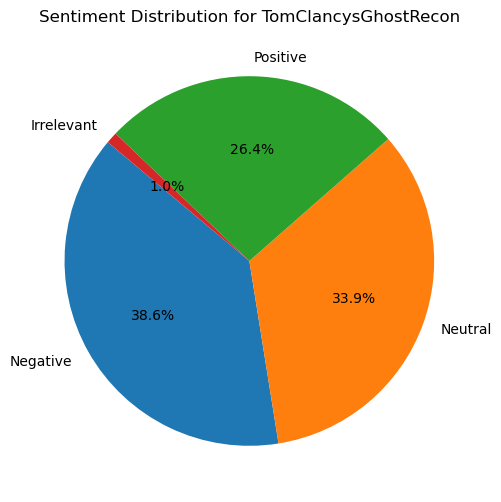

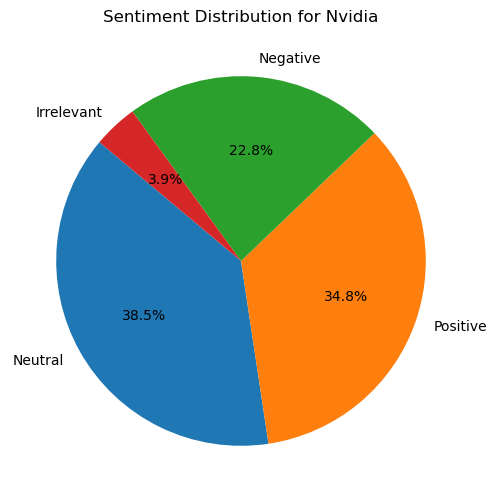

In [45]:
unique_topics = df['Topic'].unique()

for topic in unique_topics:
    # Filter data for the current topic
    topic_data = df[df['Topic'].str.contains(topic, case=False)]
    
    # Count the sentiment distribution for the current topic
    sentiment_counts = topic_data['Sentiment'].value_counts()
    
    # Plotting the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution for {topic}')
    plt.show()